
# Logistic Regression 

In this notebook we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [31]:
ad_data = pd.read_csv('../data/advertising.csv')
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Exploratory Data Analysis

Let's look at the age distributions of the customers

<Axes: xlabel='Age', ylabel='Count'>

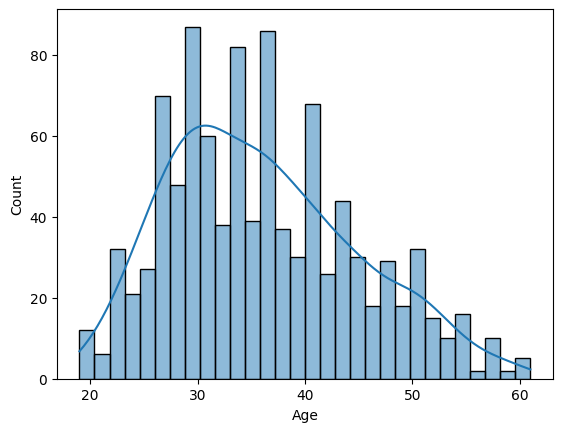

In [41]:
sns.histplot(ad_data['Age'], bins=30, kde=True)

**Jointplot showing Area Income versus Age.**

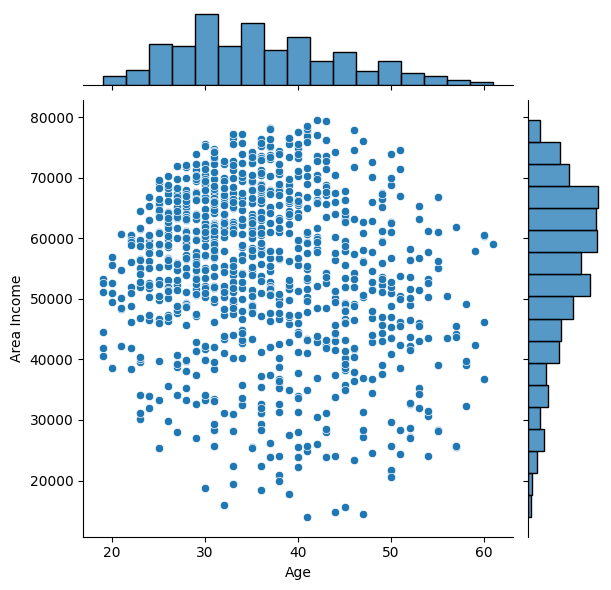

In [33]:
sns.jointplot(x='Age', y='Area Income', data=ad_data, kind='scatter')

**Jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

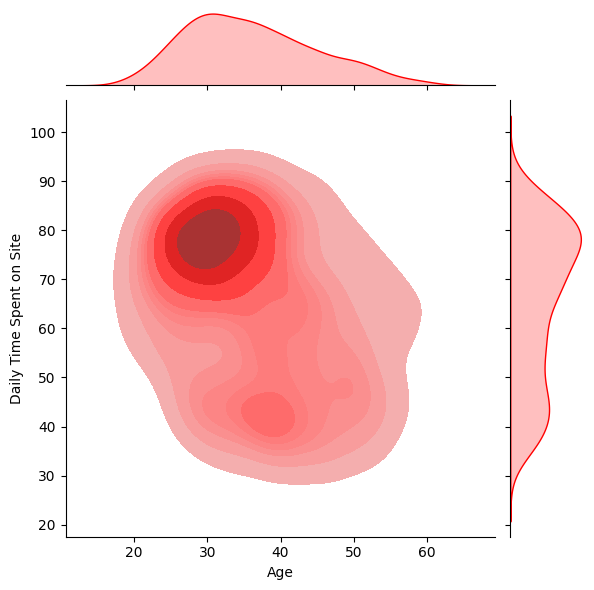

In [34]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde',fill=True,color='red')

**Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

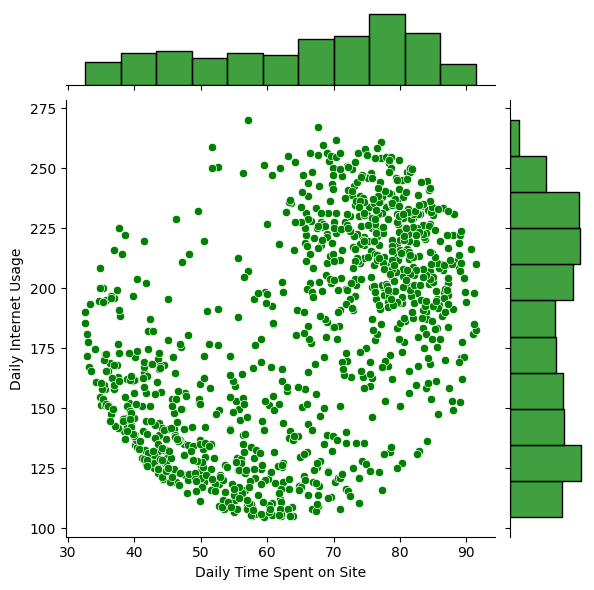

In [35]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, kind='scatter',color='green')

**Pairplot with the hue defined by the 'Clicked on Ad' column feature.**

<Figure size 1000x600 with 0 Axes>

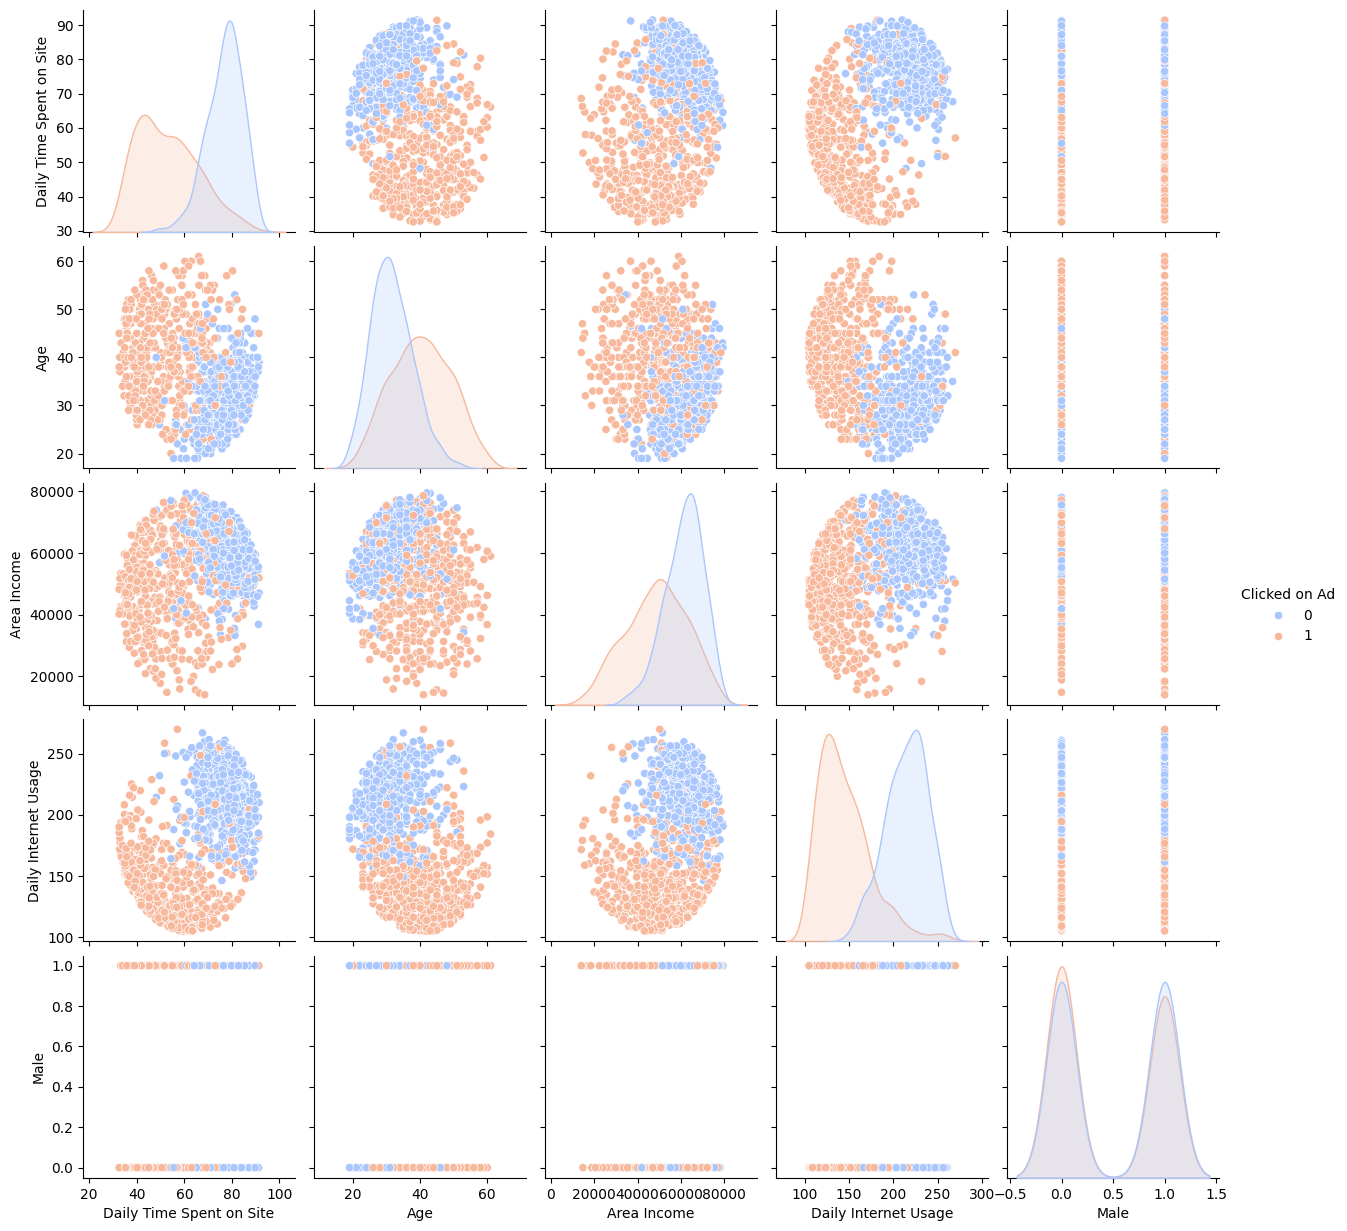

<Figure size 1000x600 with 0 Axes>

In [36]:
sns.pairplot(ad_data, hue='Clicked on Ad', palette='coolwarm') 
plt.figure(figsize=(10, 6))


# Logistic Regression

It's time to do a train test split, and train our model!

**Split the data into training set and testing set using train_test_split**

In [37]:
from sklearn.model_selection import train_test_split
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Train and fit a logistic regression model on the training set.**

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

## Predictions and Evaluations
**Now predict values for the testing data.**

In [39]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.95      0.85      0.90       168

    accuracy                           0.90       330
   macro avg       0.91      0.90      0.90       330
weighted avg       0.91      0.90      0.90       330

